<a href="https://colab.research.google.com/github/theone67833/bigdata1/blob/main/%E3%80%8C0413_ipynb%E3%80%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

套件安裝

In [3]:
pkgs <- c("tidyverse","lubridate")
install.packages(pkgs)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(tidyverse)
library(lubridate)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




匯入數據

In [42]:
nobel <- read.csv("nobel_winners.csv")

頒獎次數統計

In [43]:
nobel

prize_year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions""",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composition, which gives evidence of lofty idealism, artistic perfection and a rare combination of the qualities of both heart and intellect""",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NA,NA,NA,1907-09-07,Châtenay,France
1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its application against diphtheria, by which he has opened a new road in the domain of medical science and thereby placed in the hands of the physician a victorious weapon against illness and deaths""",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
1901,Peace,The Nobel Peace Prize 1901,NA,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NA,NA,NA,1910-10-30,Heiden,Switzerland
1901,Peace,The Nobel Peace Prize 1901,NA,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NA,NA,NA,1912-06-12,Paris,France
1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the remarkable rays subsequently named after him""",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services he has rendered by his work on sugar and purine syntheses""",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of historical writing, with special reference to his monumental work, <I>A history of Rome</I>""",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NA,NA,NA,1903-11-01,Charlottenburg,Germany
1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has shown how it enters the organism and thereby has laid the foundation for successful research on this disease and methods of combating it""",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom


In [15]:
nobel %>% count(category)

category,n
<chr>,<int>
Chemistry,194
Economics,83
Literature,113
Medicine,227
Peace,130
Physics,222


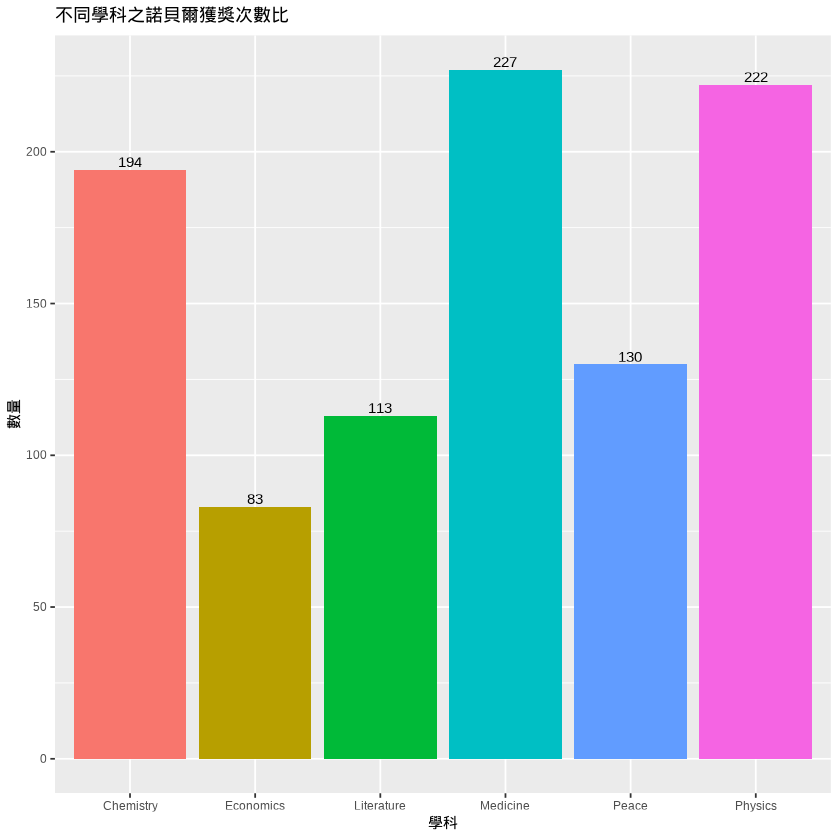

In [21]:
nobel %>%
count(category) %>%
ggplot(aes(x=category,y=n, fill=category))+
geom_col()+
geom_text(aes(label=n),vjust=-0.25)+
labs(title="不同學科之諾貝爾獲獎次數比",x="學科",y="數量")+ theme(legend.position ="none" )

使圖表變中文

In [20]:
install.packages("showtext")
library(showtext)
showtext.auto(enable=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'showtext.auto()' is now renamed to 'showtext_auto()'
The old version still works, but consider using the new function in future code



加入配色套件


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'ggthemr' from a github remote, the SHA1 (4a31e0df) has not changed since last install.
  Use `force = TRUE` to force installation



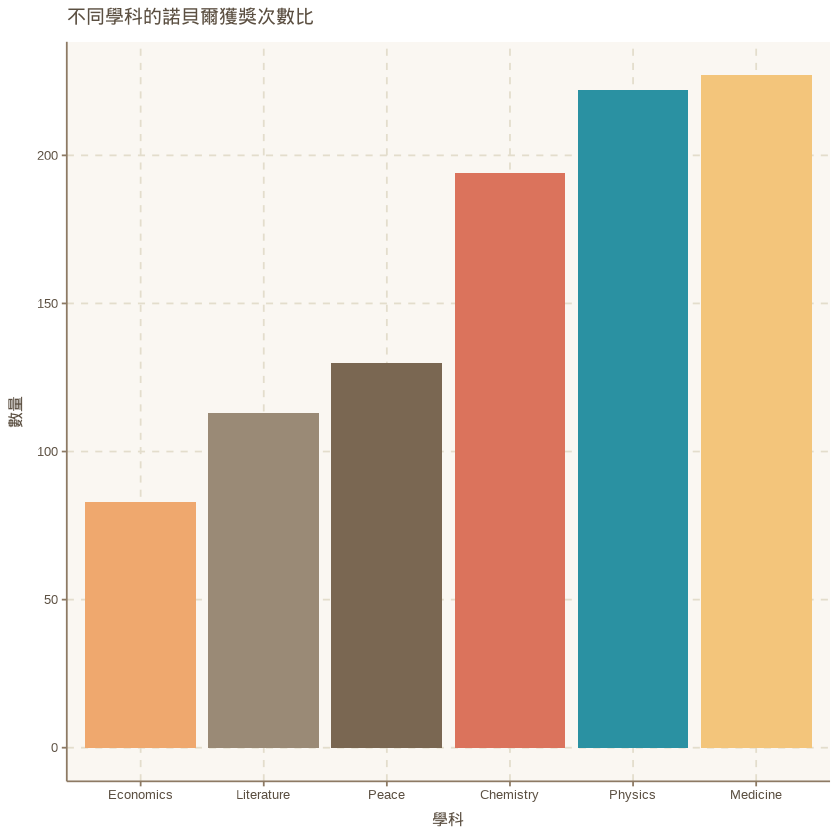

In [25]:
install.packages("devtools")
devtools::install_github('cttobin/ggthemr')

library(ggthemr)
ggthemr("dust")

nobel %>%
count(category) %>%
ggplot(aes(x= fct_reorder(category, n),y=n,fill=category))+
geom_col()+
labs(title ="不同學科的諾貝爾獲獎次數比",x="學科",y="數量")+
theme(legend.position = "none")


自訂配色與配色網站
https://learnui.design/tools/data-color-picker.html#palette

ERROR while rich displaying an object: Error: Unknown colour name: ffa600

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(prin

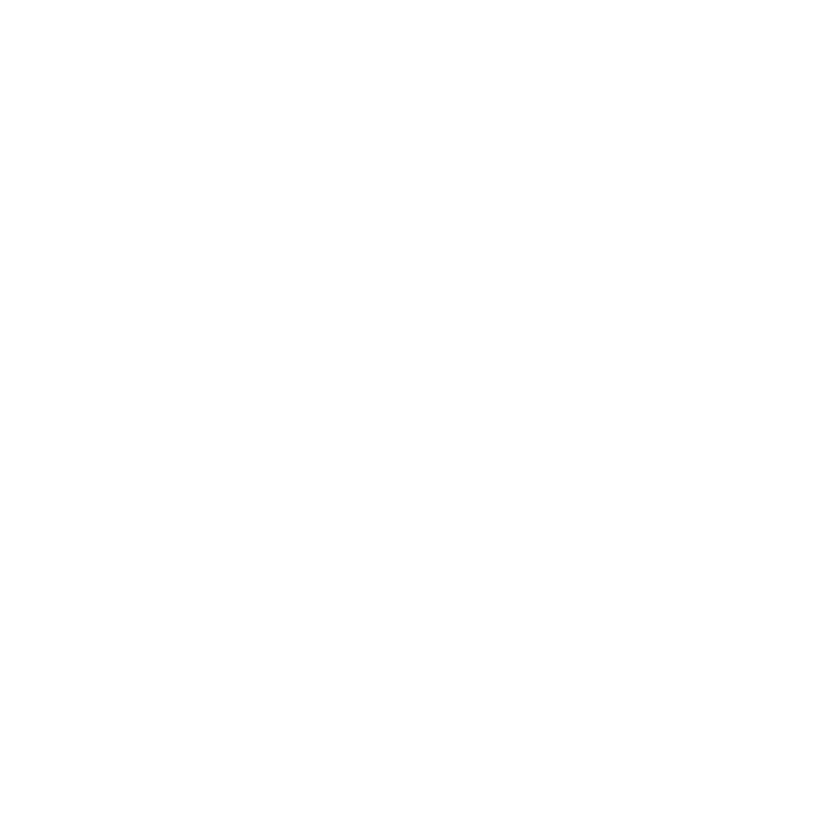

In [40]:
nobel %>%
count(category) %>%
ggplot(aes(x= fct_reorder(category, n),y=n,))+
geom_col(fill=c("#003f5c","#444e86","#955196","#dd5182","ffa600","ff6e54"))+
labs(title ="不同學科的諾貝爾獲獎次數比",x="學科",y="數量")+
theme(legend.position = "none")

In [ ]:
獲獎者國家

In [57]:
nobel %>%
 dplyr::filter(birth_country =="United Stares of America")%>%
 dplyr::select(full_name, prize_year, category)

full_name,prize_year,category
<chr>,<int>,<chr>


資料清洗

In [56]:
nobel_winners <- nobel %>%
 mutate_if (is.character,toloewer)%>%
 distinct_at(vars(full_name,prize_year,category), .keep_all=TRUE)%>%
 mutate(
   decade =10 * (prize_year %/% 10),
   prize_age=prize_year - year(birth_date)
 )
 nobel_winners

ERROR: ignored

In [ ]:
得獎次數

In [38]:
nobel_winners %>% count(full_name, sort=T)

ERROR: ignored

In [44]:
nobel_winners %>%
count(prize_age) %>%
ggplot(aes(x=prize_age, y=n))+
geom_col()

ERROR: ignored

In [59]:
nobel_winners %>%
 group_by(category) %>%
 summarise(mean_prize_age=mean(prize_age, na.rm = T))

ERROR: ignored

In [50]:
install.packages("ggridges")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [58]:
library(ggridges)

nobelwinners %>%
 ggplot(aes(
   x=prize_age,
   y=category,
   fill=category
 ))+
 geom_density_ridges()

ERROR: ignored